### Exercise 07 : Heatmap
In this exercise, let us find out if there are different patterns for users between different weekdays and between different hours
* analyze only the users and not the admins

In [54]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

connection = sqlite3.connect("../data/checking-logs.sqlite")
query = "SELECT uid, timestamp FROM checker WHERE uid LIKE 'user_%'"
get_table = pd.io.sql.read_sql(query, connection, parse_dates="timestamp")


In [55]:
week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
time = get_table.copy()
time["day"] = time["timestamp"].dt.weekday.apply(lambda x: week[x])
time.drop(columns=["timestamp"], inplace=True)
time = time.groupby(["uid", "day"]).size().reset_index(name="count_days")
time


,uid,day,count_days
0,user_0,Mon,3
1,user_1,Sat,1
2,user_1,Sun,43
3,user_1,Thu,39
4,user_1,Wed,1
...,...,...,...
133,user_7,Tue,5
134,user_7,Wed,3
135,user_8,Sat,46
136,user_8,Sun,26


In [56]:
time_hour = get_table.copy()
time_hour["hour"] = get_table["timestamp"].dt.hour
time_hour.drop(columns=["timestamp"], inplace=True)
time_hour = time_hour.groupby(["uid", "hour"]).size().reset_index(name="count_hour")
time_hour


,uid,hour,count_hour
0,user_0,17,3
1,user_1,12,1
2,user_1,16,1
3,user_1,17,8
4,user_1,19,21
...,...,...,...
303,user_8,16,14
304,user_8,17,7
305,user_8,19,7
306,user_8,20,1


In [57]:
pivot_table_days = time.pivot_table(index="day", columns="uid", values="count_days")
pivot_table_days = pivot_table_days.fillna(0)
total_commits_per_user = pivot_table_days.sum(axis=0)
sorted_users = total_commits_per_user.sort_values(ascending=False).index
pivot_table_days = pivot_table_days.reindex(week)
pivot_table_days = pivot_table_days[sorted_users]
pivot_table_days

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
day,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,0.0,2.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,8.0,0.0,1.0,0.0,0.0


In [58]:
pivot_table_hours = time_hour.pivot_table(index="hour", columns="uid", values="count_hour")
pivot_table_hours = pivot_table_hours.fillna(0)
total_commits_per_user = pivot_table_hours.sum(axis=0)
sorted_users = total_commits_per_user.sort_values(ascending=False).index
pivot_table_hours = pivot_table_hours.reindex(range(24), fill_value=0)
pivot_table_hours = pivot_table_hours[sorted_users]
pivot_table_hours


uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


* you can choose the color palette that you like for both of the graphs that you will
need to draw in this exercise
* use the table checker for your query
* use absolute values of the commits, not the averages
* sort the dataframes by the total number of commits made by a user

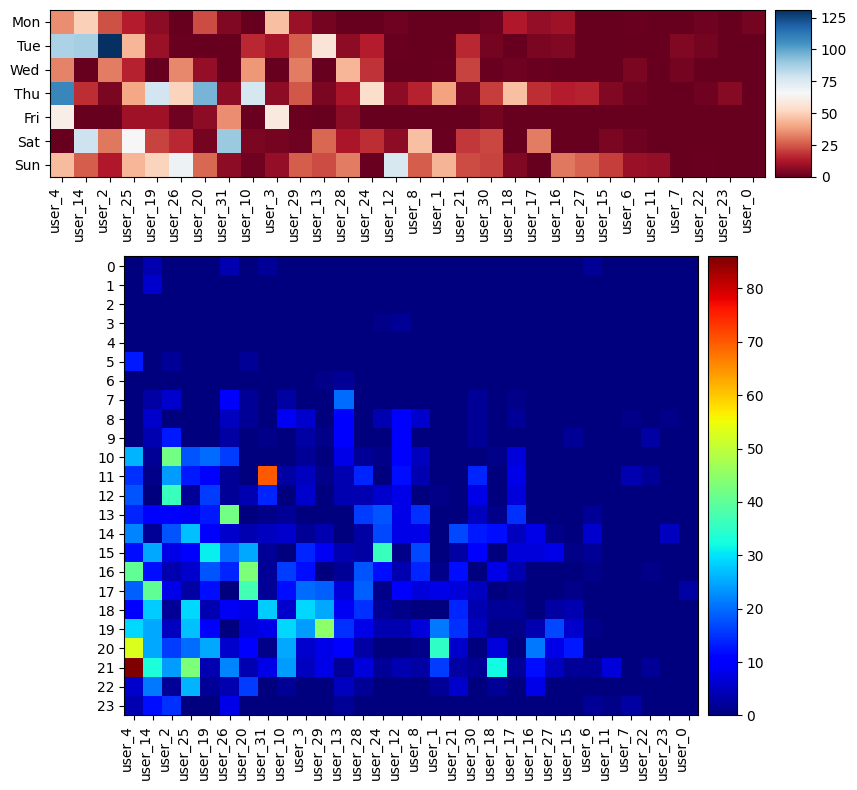

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={"height_ratios": [1, 2.75]})

im1 = ax1.imshow(pivot_table_days.values, cmap="RdBu", aspect="equal")
ax1.set_xticks(range(len(pivot_table_days.columns)))
ax1.set_xticklabels(pivot_table_days.columns, rotation=90, ha="right")
ax1.set_yticks(range(len(pivot_table_days.index)))
ax1.set_yticklabels(pivot_table_days.index)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im1, cax=cax1)

im2 = ax2.imshow(pivot_table_hours.values, cmap="jet", aspect="equal")
ax2.set_xticks(range(len(pivot_table_hours.columns)))
ax2.set_xticklabels(pivot_table_hours.columns, rotation=90, ha="right")
ax2.set_yticks(range(len(pivot_table_hours.index)))
ax2.set_yticklabels(pivot_table_hours.index)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im2, cax=cax2)

plt.tight_layout()
plt.show()



* at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):
  * ◦ “Which user has the most commits on Tue?” The answer: user_*. 
  * “Which user has the most commits on Thu?” The answer: user_*. 
  * “On which weekday do the users not like making a lot of commits?” The
answer, for example: Mon. 
  * “Which user at which hour made the largest number of commits?” The answer,
for example: user_1, 15

Which user has the most commits on Tue?

Answer: user_2

Which user has the most commits on Thu?

Answer: user_4

On which weekday do the users not like making a lot of commits?

Answer: Fri

Which user at which hour made the largest number of commits?

Answer: user_4, 21

In [60]:
connection.close()